<h1 style="text-align:center; color:black;"><b>Import Required Libraries</b></h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="text-align:center; color:black;"><b>Load the Dataset</b></h1>

In [4]:
df = pd.read_csv("website data.csv")

In [5]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


<h1 style="text-align:center; color:black;"><b>Data Cleaning</b></h1>

In [32]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ("Channel group", "DateHour", "Users", "Sessions", "Engaged Sessions", "Average engagement time per session",	"Engaged sessions per user",	"Events per session",	"Engagement rate",	"Event count", "Hour")

In [33]:
df.head()

,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
1,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
2,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
3,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19
4,Direct,2024-04-16 22:00:00,158,192,94,39.020833,0.594937,4.057292,0.489583,779,22


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Channel group                                3181 non-null   object
 1   DateHour                                     3181 non-null   object
 2   Users                                        3181 non-null   object
 3   Sessions                                     3181 non-null   object
 4   Engaged Sessions                             3181 non-null   object
 5   Average Average engagement time per session  3181 non-null   object
 6   Engaged sessions per user                    3181 non-null   object
 7   Events per session                           3181 non-null   object
 8   Engagement rate                              3181 non-null   object
 9   Event count                                  3181 non-null   object
dtypes: object(10

In [14]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format = "%Y%m%d%H", errors = "coerce")


In [15]:
numeric_cols = df.columns.drop(["Channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = "coerce")
df["Hour"] = df["DateHour"].dt.hour

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Channel group                                3181 non-null   object        
 1   DateHour                                     3181 non-null   datetime64[ns]
 2   Users                                        3181 non-null   int64         
 3   Sessions                                     3181 non-null   int64         
 4   Engaged Sessions                             3181 non-null   int64         
 5   Average Average engagement time per session  3181 non-null   float64       
 6   Engaged sessions per user                    3181 non-null   float64       
 7   Events per session                           3181 non-null   float64       
 8   Engagement rate                              3181 non-null   float64       
 9

In [34]:
df.head()

,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
1,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
2,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
3,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19
4,Direct,2024-04-16 22:00:00,158,192,94,39.020833,0.594937,4.057292,0.489583,779,22


<h1 style="text-align:center; color:black;"><b>Descriptive Statistics</b></h1>

In [35]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3179,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000
mean,2024-04-20 01:20:29.820698368,41.776345,50.989305,28.229317,66.669863,0.606439,4.676117,0.503410,241.363007,11.797735
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.091250,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-04-20 03:00:00,42.000000,51.000000,27.000000,49.096154,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.518519,0.750000,5.218981,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,187.000000,256.000000,125.000000,4525.000000,2.000000,56.000000,1.000000,1117.000000,23.000000
std,NaN,29.129828,36.328970,20.417710,127.257871,0.264147,2.796538,0.228313,182.081506,6.883023


<h1 style="text-align:center; color:black;"><b>Exploratory Data Analysis</b></h1>

<h3 style="text-align:left; color:black;"><b>Sessions and Users Overtime</b></h3>

In [ ]:
sns.set(style = "whitegrid")

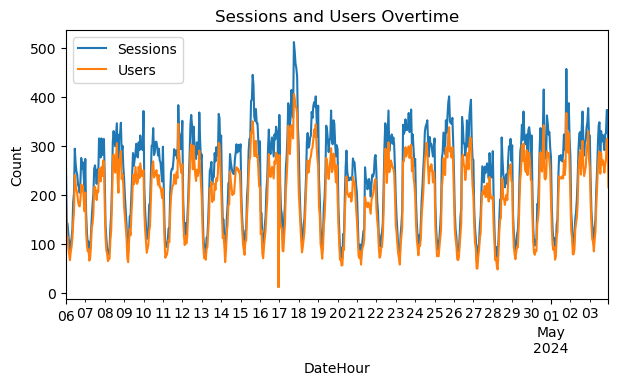

In [26]:
plt.figure(figsize=(7,3.5))
df.groupby("DateHour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users Overtime")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

<h3 style="text-align:left; color:black;"><b>Total Users by Channel</b></h3>

C:\Users\Hp\AppData\Local\Temp\ipykernel_25072\2758944582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x= "Channel group", y= "Users", estimator= np.sum, palette = "viridis")


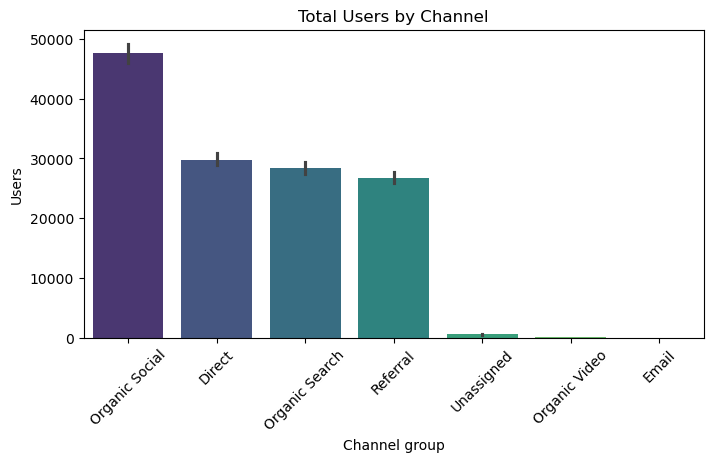

In [30]:
plt.figure(figsize = (8,4))
sns.barplot(data = df, x= "Channel group", y= "Users", estimator= np.sum, palette = "viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation = 45)
plt.show()

<h3 style="text-align:left; color:black;"><b>Average Engagement Time per Session</b></h3>

C:\Users\Hp\AppData\Local\Temp\ipykernel_25072\2444234297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x= "Channel group", y= "Average engagement time per session", estimator=np.mean, palette="magma")


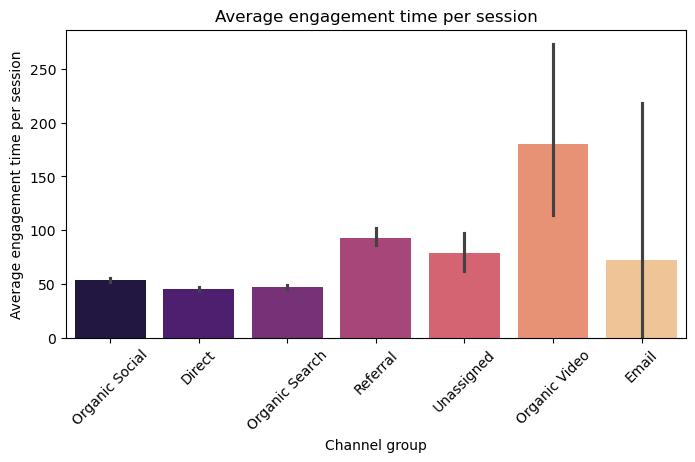

In [37]:
plt.figure(figsize= (8,4))
sns.barplot(data=df, x= "Channel group", y= "Average engagement time per session", estimator=np.mean, palette="magma")
plt.title("Average engagement time per session")
plt.xticks(rotation = 45)
plt.show()

<h3 style="text-align:left; color:black;"><b>Engagement Rte Distribution by Channel</b></h3>

C:\Users\Hp\AppData\Local\Temp\ipykernel_25072\570584407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Channel group", y="Engagement rate", palette = "coolwarm")


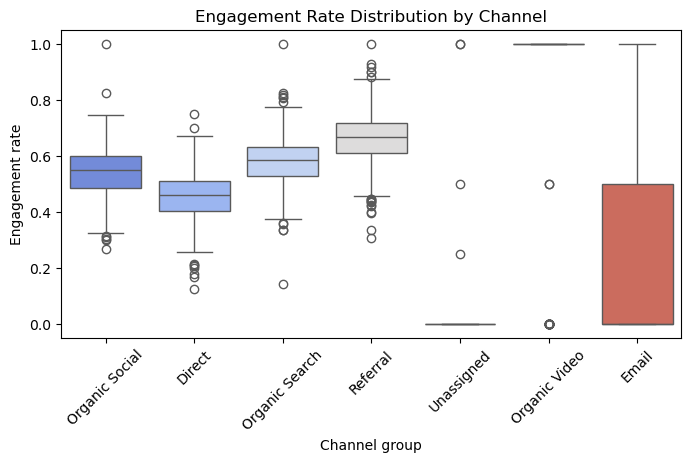

In [40]:
plt.figure(figsize= (8,4))
sns.boxplot(data=df, x="Channel group", y="Engagement rate", palette = "coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

<h3 style="text-align:left; color:black;"><b>Engaged vs Non Engaged Sessions</b></h3>

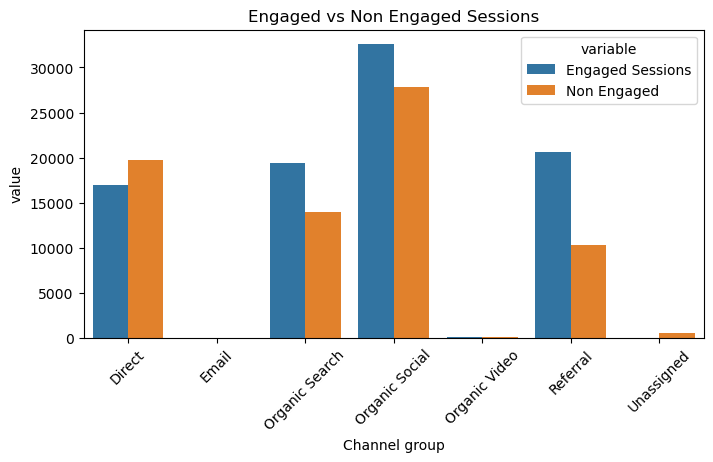

In [41]:
session_df = df.groupby("Channel group")[["Sessions", "Engaged Sessions"]].sum().reset_index()
session_df["Non Engaged"] = session_df["Sessions"]-session_df["Engaged Sessions"]
session_df_melted = session_df.melt(id_vars = "Channel group", value_vars = ["Engaged Sessions", "Non Engaged"])


plt.figure(figsize = (8,4))
sns.barplot(data=session_df_melted, x="Channel group", y="value", hue="variable")
plt.title("Engaged vs Non Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

<h3 style="text-align:left; color:black;"><b>Traffic by Hour and Channel</b></h3>

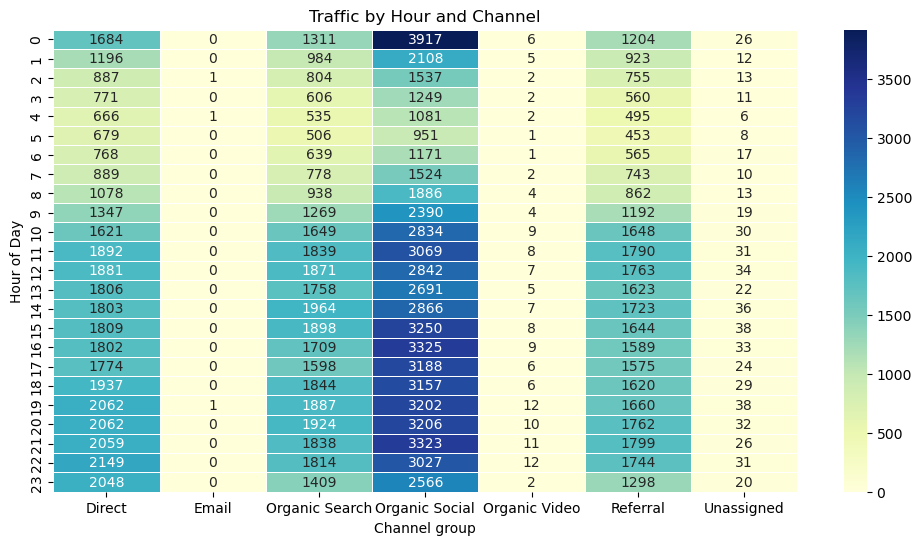

In [47]:
heatmap_data = df.groupby(["Hour", "Channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidth = .5, annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel group")
plt.ylabel("Hour of Day")
plt.show()

<h3 style="text-align:left; color:black;"><b>Engagement rate vs Sessions Overtime</b></h3>

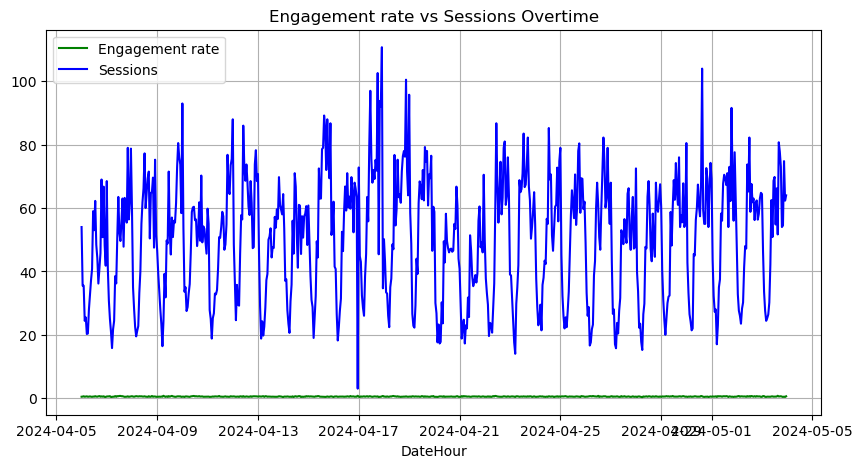

In [50]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize = (10,5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue" )
plt.title("Engagement rate vs Sessions Overtime")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()         